# Introduction
## For this project, we will look at data from the National Parks Service about endangered species in different parks. We will be analyzing the biodiversity and seeing if there are any trends or patterns to which species are likely to become endangered.
### Importing Our Data

The first step we will take is to import all the libraries that we will be using in order to analyze our data.

After importing the libraries, we will load the two datasets that we have available and look at the first few rows to have a better understanding of how we will proceed with the analysis.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

species = pd.read_csv(r'C:\Users\amyar\Downloads\biodiversity-starter\biodiversity_starter\species_info.csv')
observations = pd.read_csv(r'C:\Users\amyar\Downloads\biodiversity-starter\biodiversity_starter\observations.csv')

print(species.head(10))
print(observations.head(10))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer  

There are a lot of NaN in the conservation_status column. These are in place for all the species that are not endangered and so need no interventions. We will replace the NaN with "No Intervention".

In [31]:
species.fillna(value = "No Intervention", inplace=True)

Now we will go breakdown our dataset to see how many different species there are, the different types of species, and the levels of status concerns.

In [32]:
print("There are " + str(len(species['scientific_name'].unique())) + (" different species."))
print("The categories of different species are listed as follows: ")
print(species['category'].unique())
print("The different types of stats concerns are also listed as follows: ")
print(species['conservation_status'].unique())

There are 5541 different species.
The categories of different species are listed as follows: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
The different types of stats concerns are also listed as follows: 
['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


In [33]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [34]:
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [35]:
status_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')
print(status_counts)

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


### Creating Bar Charts
We will create our first bar chart that shows the number of species we have for each level of concern.

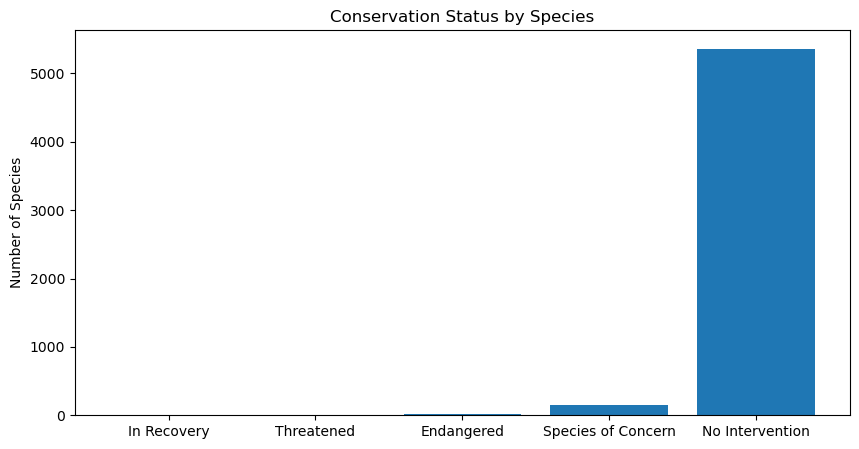

In [39]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot()
plt.bar(status_counts['conservation_status'], status_counts['scientific_name'])
ax.set_xticks(range(len(status_counts)))
plt.ylabel("Number of Species")
plt.title("Conservation Status by Species")
plt.show()

To get a better view and understanding of the species that do have conservation concerns, let's break it down without the "No Intervention" group. We can create a chart that separates the different levels of conservation status with the different types of species. From there, we can create another bar chart that's stacked to show the total number of species that are in concerned levels, separated by the species that make up each stack.

In [36]:
ConsCategory = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
print(ConsCategory.head())

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


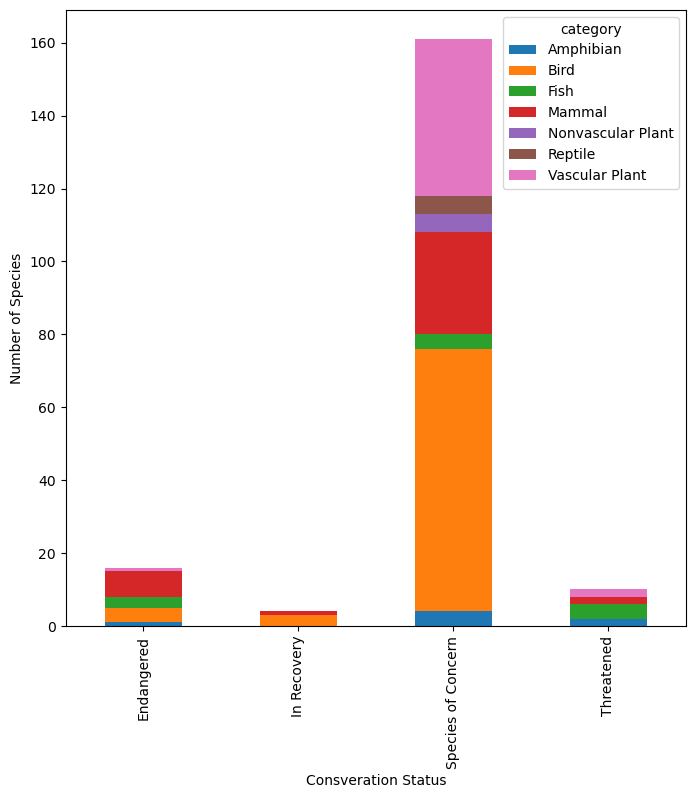

In [44]:
ax = ConsCategory.plot(kind='bar', figsize=(8,8), stacked=True)
ax.set_xlabel("Consveration Status")
ax.set_ylabel("Number of Species");

### Performing Statistics

The next step we will take involves finding the total percentage of species that are endangered. In order to do this, we will need to create another column in the species dataframe called 'is_protected'.

In [45]:
species['is_protected'] = species['conservation_status'].apply(lambda x: True if x != "No Intervention" else False)
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


In [47]:
status_counts = species.groupby(['category', 'is_protected']).count()
print(status_counts)

                                scientific_name  common_names  \
category          is_protected                                  
Amphibian         False                      73            73   
                  True                        7             7   
Bird              False                     442           442   
                  True                       79            79   
Fish              False                     116           116   
                  True                       11            11   
Mammal            False                     176           176   
                  True                       38            38   
Nonvascular Plant False                     328           328   
                  True                        5             5   
Reptile           False                      74            74   
                  True                        5             5   
Vascular Plant    False                    4424          4424   
                  True   

The above table is a little difficult to read. Let's pivot it to make it more understandable, and also change the names of the columns to better fit our data.

In [51]:
status_pivot = pd.pivot_table(status_counts, values = 'scientific_name', index = 'category', columns = ['is_protected'])
print(status_pivot)

is_protected       False  True
category                      
Amphibian             73     7
Bird                 442    79
Fish                 116    11
Mammal               176    38
Nonvascular Plant    328     5
Reptile               74     5
Vascular Plant      4424    46


In [52]:
status_pivot.columns = ['not_protected', 'protected']
print(status_pivot)

                   not_protected  protected
category                                   
Amphibian                     73          7
Bird                         442         79
Fish                         116         11
Mammal                       176         38
Nonvascular Plant            328          5
Reptile                       74          5
Vascular Plant              4424         46


In [58]:
status_pivot['percent_protected'] = status_pivot['protected']/(status_pivot['protected']+status_pivot['not_protected']) * 100
print(status_pivot)

                   not_protected  protected  percent_protected
category                                                      
Amphibian                     73          7           8.750000
Bird                         442         79          15.163148
Fish                         116         11           8.661417
Mammal                       176         38          17.757009
Nonvascular Plant            328          5           1.501502
Reptile                       74          5           6.329114
Vascular Plant              4424         46           1.029083


From this chart, it looks like Mammals are more likely to be endangered than Birds. Let's perform a significance test by using a chi squared test. First we will need a contingency table. We're going to need to import the chi2_contingency function from scipy in order to do so. For the test to be significant, the p-value should be less than 0.05.

In [59]:
contingency = status_pivot.loc[['Mammal', 'Bird'], ['protected', 'not_protected']]
print(contingency)

          protected  not_protected
category                          
Mammal           38            176
Bird             79            442


In [60]:
from scipy.stats import chi2_contingency

chi2_contingency(contingency)

(0.5810483277947567,
 0.445901703047197,
 1,
 array([[ 34.06530612, 179.93469388],
        [ 82.93469388, 438.06530612]]))

The p-value in the above test was 0.44, meaning there was no signifance difference between the Mammals and Birds. We can compare Mammals and Reptiles next to see if there is a significant difference between the two.

In [67]:
contingency2 = status_pivot.loc[['Mammal', 'Reptile'], ['protected', 'not_protected']]
print(contingency2)
print(chi2_contingency(contingency2))

          protected  not_protected
category                          
Mammal           38            176
Reptile           5             74
(5.139702724228909, 0.02338465214871547, 1, array([[ 31.40614334, 182.59385666],
       [ 11.59385666,  67.40614334]]))


The p-value is 0.023, making this difference significant.

### Looking at Observations

Next, we will look at the observations table that we imported in the beginning. Let's figure out which species has been observed the most.

In [80]:
from itertools import chain
import string

def remove_punctuation(name):
    for punctuation in string.punctuation:
        name = name.replace(punctuation, '')
    return name

common_names = species[species.category == 'Mammal'].common_names.apply(remove_punctuation).str.split().tolist()
print(common_names[:10])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison', 'Bison'], ['Aurochs', 'Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated', 'Cattle'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'], ['Wapiti', 'Or', 'Elk'], ['WhiteTailed', 'Deer'], ['Feral', 'Hog', 'Wild', 'Pig'], ['Coyote'], ['Gray', 'Wolf'], ['Red', 'Wolf']]


In [81]:
clean_rows = []
for z in common_names:
    z = list(dict.fromkeys(z))
    clean_rows.append(z)
print(clean_rows[:10])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison'], ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'], ['Wapiti', 'Or', 'Elk'], ['WhiteTailed', 'Deer'], ['Feral', 'Hog', 'Wild', 'Pig'], ['Coyote'], ['Gray', 'Wolf'], ['Red', 'Wolf']]


In [82]:
results = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
print(results[:10])

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated']


In [84]:
words_counted = []
for i in results:
    x = results.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns = ['Word', 'Count']).sort_values('Count', ascending=False).head(10)

,Word,Count
34,Bat,23
199,Shrew,18
112,Myotis,17
171,Mouse,16
80,Chipmunk,13
17,American,12
14,Squirrel,12
127,Vole,11
130,Eastern,11
202,Mountain,10


From this chart, we can see that Bats have had the most observations in this data set, followed closely by Shrews, Myotises, and Mice.

However, there's a mix between different bats observed and other species. We will break this down even more by sifting through the common names and searching for bat. We will create another column titled 'is_bat'.

In [87]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Now that we have our comprehensive list of bats, let's merge this table with the observations table. Doing this will help us count the number of bats seen in each National Park, and we can go further to separate which bats are and are not protected in each park as well.

In [88]:
total_bat_obsv = observations.merge(species[species.is_bat])
print(total_bat_obsv)

              scientific_name                            park_name  \
0       Lasiurus blossevillii                  Bryce National Park   
1       Lasiurus blossevillii  Great Smoky Mountains National Park   
2       Lasiurus blossevillii               Yosemite National Park   
3       Lasiurus blossevillii            Yellowstone National Park   
4    Corynorhinus rafinesquii               Yosemite National Park   
..                        ...                                  ...   
139            Myotis sodalis            Yellowstone National Park   
140             Myotis leibii               Yosemite National Park   
141             Myotis leibii                  Bryce National Park   
142             Myotis leibii  Great Smoky Mountains National Park   
143             Myotis leibii            Yellowstone National Park   

     observations category                                       common_names  \
0             113   Mammal                                    Western Red Bat 

In [89]:
total_bat_obsv.groupby('park_name').observations.sum().reset_index()
obsv_by_park = total_bat_obsv.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
print(obsv_by_park)

                             park_name  is_protected  observations
0                  Bryce National Park         False          1596
1                  Bryce National Park          True          1837
2  Great Smoky Mountains National Park         False          1299
3  Great Smoky Mountains National Park          True          1112
4            Yellowstone National Park         False          4044
5            Yellowstone National Park          True          4318
6               Yosemite National Park         False          2345
7               Yosemite National Park          True          2441


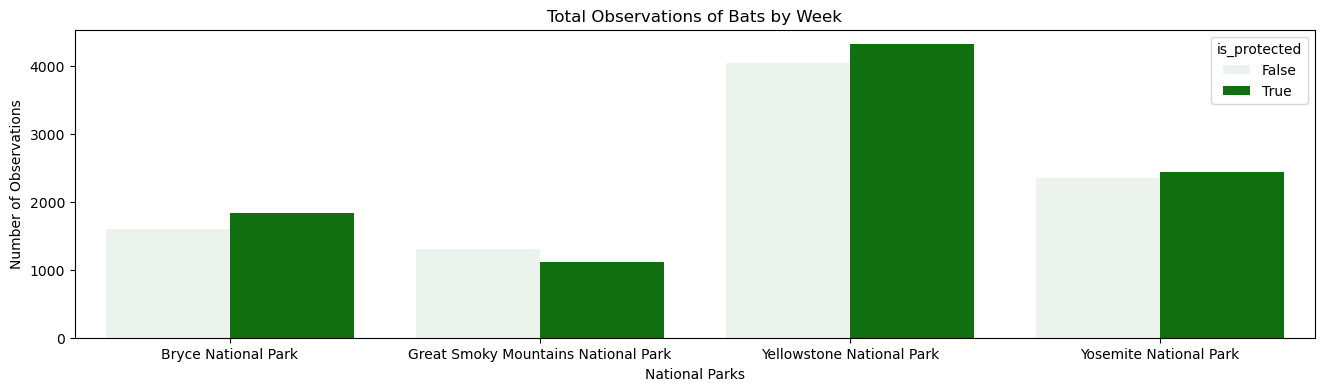

In [105]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obsv_by_park.park_name, y=obsv_by_park.observations, hue=obsv_by_park.is_protected, color='green')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Total Observations of Bats by Week')
plt.show()

In the above bar chart, we can see that Bryce National Park, Yellowstone National Park, and Yosemite National Park all have had more observations of protected species than non protected species. This indicates a positive inclination towards the improvement of their bat populations from the concerned lists. Great Smoky Mountains National Park is the only park showing more observations of non protected species than protected ones, meaning they might consider more methods in order to improve their population.